# Milestone #1: Data Preparation
## Abstract
Music information is an important area in modern information systems, with applications ranging from recommendation engines to lyric-based search platforms. In this project, we present Tunix, a text-based search system inspired by Shazam, but designed to work without audio input. Instead, Tunix allows users to search for songs by typing lyrics, retrieving corresponding tracks, artists, and descriptive metadata.

The final system aims to provide efficient lyric-based search functionality, offering accurate results along with artist descriptions and related attributes, thereby improving music discovery through text queries.

## Introduction
Music retrieval systems such as Shazam have transformed how users interact with music, but they are primarily based on audio fingerprinting. In many cases, users may remember a fragment of lyrics rather than the melody. This project addresses this gap by creating Tunix, a system that retrieves songs, artists, and related information based on text queries derived from lyrics.

Tunix will integrate datasets containing tracks, artists, lyrics, and metadata into a unified and searchable database. The system is designed to return not only the matching track but also relevant contextual information such as artist biography and related metadata. This project contributes to the field of Information Retrieval by developing a structured pipeline for music data collection and preparation, enabling efficient and accurate text-based search functionalities.

## Data search:
- During our search for a suitable music dataset, we found many databases on this topic. However, most of them lacked song lyrics, while others included numerous attributes such as danceability and liveness, which were not relevant to our main objective. The biggest challenge we faced was related to artist information, as it was difficult to find datasets containing proper artist descriptions. To address this issue, we discovered that several APIs provide detailed information: given the name of a song, it is possible to retrieve the artist’s name, description, and additional attributes related to the song, the artist, and even the album.
### Data search Result:
#### search repositories for datasets

| Dataset URL | Attributes | Pros | Cons | Database Type |
|-------------|------------|------|------|---------------|
| [Audio features and lyrics of Spotify songs](https://www.kaggle.com/datasets/imuhammad/audio-features-and-lyrics-of-spotify-songs/data) | track_id, track_name, track_artist, lyrics, track_popularity, track_album_id, track_album_name, track_album_release_date, playlist_name, playlist_id, playlist_genre, playlist_subgenre, danceability, energy, key, loudness, mode, speechiness, instrumentalness, liveness, valence, tempo, duration_ms, language | A lot of information about the songs and many different tracks | Some songs don’t have lyrics and the number of songs per artist is a bit limited. Too many non-essential attributes | Songs |
| [Spotify Million Song Dataset](https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset) | song_name, artist_name, link, lyrics | Good balance of attributes, consistent number of songs per artist, and overall a well-sized dataset | Some inconsistencies in how values are obtained — description states data comes from the Spotify API, but song links are from a lyrics website | Songs |
| [Song Lyrics Dataset](https://www.kaggle.com/datasets/deepshah16/song-lyrics-dataset/data) | Artist, Title, Album, Date, Lyric, Year | Well-structured by artist; good complementary dataset to enrich the main dataset with lyrics information | Some songs do not have lyrics (marked consistently with the string "lyrics for this song have yet to be released please check back once the song has been released"); easy to detect and filter | Songs |
| [Lyrics and Metadata from 1950 to 2019](https://data.mendeley.com/datasets/3t9vbwxgr5/2) | artist_name, track_name, release_date, genre, lyrics, len, dating, violence, world/life, night/time, shake the audience, family/gospel, romantic, communication, obscene, music, movement/places, light/visual perceptions, family/spiritual, like/girls, sadness, feelings, danceability, loudness, acousticness, instrumentalness, valence, energy, topic, age | Very rich dataset with a large number of songs and detailed metadata | May have too many artists with only a few songs each and includes many non-essential attributes | Songs |
| [Artists](https://www.upf.edu/web/mtg/semantic-similarity) | artist_name,artist_mbid,biography,top_10_similar_mbids,dbpedia_uri | Very rich dataset with a large number of artists and detailed metadata | Its not a raw dataSet, its a set of files that need to be conected can be harder to work  | Artists |


#### Web scraping / crawling
- Maybe this is the best aprouch since there is not a lot of good datasbases with the artist bio

| Option Name | Method | Pros | Cons |
|-------------|--------|------|------|
| Wikipedia | Web scraping of artist pages | Usually rich and up-to-date textual content; covers a wide range of artists; freely accessible | Needs to handle disambiguation of artist names; scraping may be blocked if too many requests; text may require cleaning |
| DBpedia | SPARQL queries on DBpedia endpoint | Structured data extracted from Wikipedia; supports multiple languages; can get abstracts directly | Limited to artists with DBpedia entries; not all biographies are complete; requires knowledge of SPARQL |
| Wikidata | SPARQL queries on Wikidata endpoint | Very structured; easy to link with other datasets via QIDs; can extract multiple attributes | Not all artists have detailed biographies; abstracts are shorter than Wikipedia; requires SPARQL knowledge |
| Last.fm API | Queries the `artist.getInfo` endpoint to get `bio.content` | Easy to use; provides textual content ready for NLP | Low rate limiting (but manageable if calls are distributed) |
| Genius API | Queries the `/search` endpoint and retrieves the artist page `/artists/:id` | Focused on artist bios; very rich content | Low rate limiting; requires an API key |


## Select convenient data subsets

- Despite the availability of several good databases, we chose the Spotify Million Song Dataset. Although it contains fewer features, it is rich in music records and has fewer distinct artists, which reduces the number of required API calls. This way, we obtain fewer artists but more songs per artist. We also assumed that any additional attributes could later be retrieved through APIs to complement the dataset with artist information. 
- For this purpose, we selected the Genius API, as it focuses specifically on artists and music, providing detailed descriptions and additional metadata.

## Assess the authority of the data source and data quality
- Dataset: Spotify Million Song Dataset – Kaggle:
    - Authority: Public dataset on Kaggle, licensed CC0 (free to use). It’s a subset of the original Million Song Dataset.
    - Data Quality: Contains song names, artist names, lyrics, and links. Some entries may be missing or duplicate. 
- Genius API:
    - Authority: Genius is a well-known platform for song lyrics and artist info. The API is official, documented, and widely used.
    - Data Quality: Provides structured, regularly updated data. Some songs or artists may be missing, and user-contributed info can vary in quality.
## Exploratory Data Analysis:

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


data loaded
===== DATAFRAME SHAPE =====
Rows: 57650, Columns: 4

===== COLUMN NAMES AND DATA TYPES =====
artist    object
song      object
link      object
text      object
dtype: object 

===== MISSING VALUES =====
No missing values

===== DUPLICATE ROWS =====
Number of duplicate rows: 0

===== UNIQUE VALUES PER COLUMN =====
artist: 643 unique values
song: 44824 unique values
link: 57650 unique values
text: 57494 unique values

===== Average song per artis =====
89.65785381026438

===== BASIC STATISTICS FOR NUMERIC COLUMNS =====
No numeric columns.

===== MOST FREQUENT VALUES FOR CATEGORICAL COLUMNS =====
artist:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Name: count, dtype: int64

song:
song
Have Yourself A Merry Little Christmas    35
Angel                                     28
Home                                      27
Hold On                                   27
I Believe                        

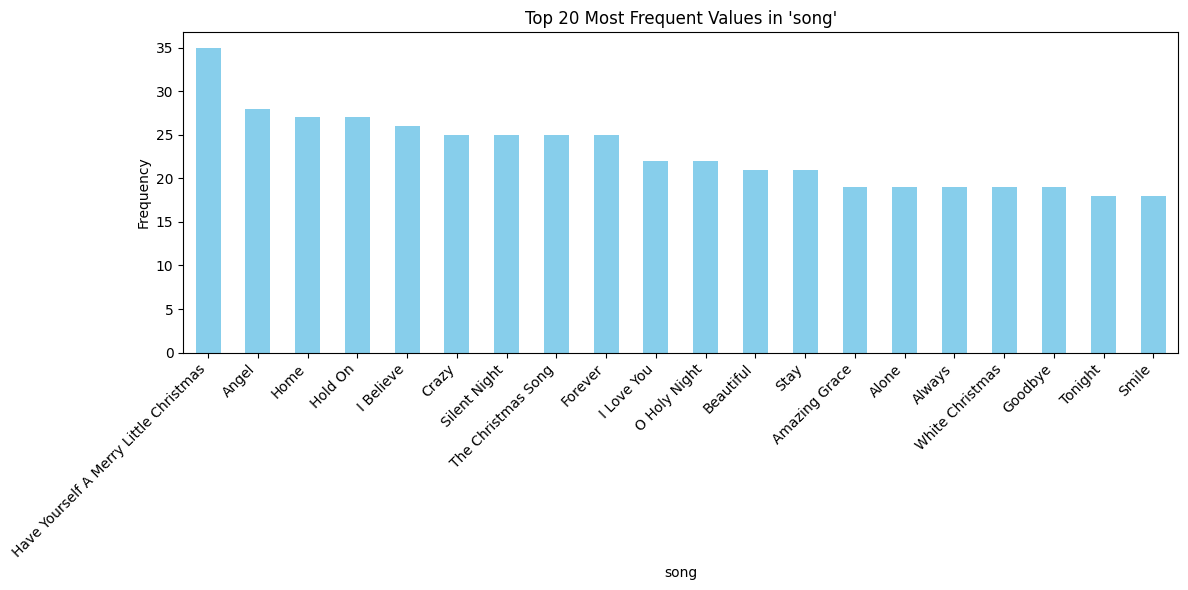

In [2]:
import data_utils
import importlib

importlib.reload(data_utils)
df=data_utils.load_data()
data_utils.dataAnalysis(df)
#data_utils.plot_artist_frequency(df, col="artist", top_n=20,most=True)
#data_utils.plot_artist_frequency(df, col="artist", top_n=20,most=False)
data_utils.plot_column_frequency(df,"song",20)


### Exploratory Data Analysis resume:
- **Atributes**:
    - artist-Artist Name
    - Song- The name of the song
    - Link-An identifier of the song
    - Text- The lyric of the song
- **Lyrics Structure**
    - Paragraphs separated by `\r\n` (each line or group of lines is a verse or pause)
    - Repeated lines indicate choruses or refrains
    - Variable length (short or long lyrics)
    - Keywords may indicate themes (e.g., "Christmas", "love", "baby")
    - Some lines contain musical notes or instructions (e.g., "[Chorus]")
    - Formatting may vary slightly between songs (extra spaces, capitalization)
    - Identical lyrics can appear for different artists (covers)

- **Link structure**
  - Each link points to a **unique song page** on lyricsfreak
  - The URL usually contains:
    - **Artist name** (`/a/abba/` → ABBA)
    - **Song title** (`ahes+my+kind+of+girl`)
  - The number at the end (e.g., `_20598417`) is a **unique  song ID**

- **Unique values**:
    - Looking to the unique values we can conclude that there in mean like 89 songs per artis which is your goal since we dont want to call the artist APi that much
    - The low unique values of the songs is because there are a lot of songs with the same name and  difrent version of the same song with difrent singers
    - The diference between the number of links and the number of text is because we have songs with same lyrics they are the same songs but they have difrent artist singing it 
    


## Prepare and Document a Data Processing Pipeline

### Main Idea
The goal is to **enrich our dataset** with additional information obtained via the **Genius API**.  
We want to collect:
- **Primary Artist Description**
- **Album Description**

### How to Achieve This
1. **Iterate through dataset entries** (songs and artists).
2. **Search endpoint**: Use the Genius API search to retrieve the Genius IDs for both the **artist** and the **song**.  
   - Endpoint:  
     ```
     GET https://api.genius.com/search?q={song name} {artist name}
     ```
3. **Retrieve album information** using the song ID.  
   - Endpoint:  
     ```
     GET https://api.genius.com/songs/{SONG_ID}
     ```
   - Data retrieved: Album name, URL, cover art, release date (if available).
4. **Retrieve artist information** using the artist ID.  
   - Endpoint:  
     ```
     GET https://api.genius.com/artists/{ARTIST_ID}
     ```
   - Data retrieved: Artist description, bio, and additional metadata.
### Data storage:
To improve data organization and scalability, we will structure the database into **three main tables** (with the possibility of adding more attributes if needed):

#### 1. Musics
- **Music_ID** (primary key)  
- **Artist_ID** (foreign key → Artist table)  
- **Lyrics**  
- **Music_description**
- **Album_Name**
- **realease_date**

#### 2. Artists
- **Artist_ID** (primary key)  
- **Artist_Name**  
- **Artist_Bio** 

 

### Expected Outcome
- Enriched dataset that contains:
  - Original song data (from our CSV)
  - Linked album metadata (title, release date, cover art, URL)
  - Linked artist metadata (biography/description)
- Improved analysis possibilities (e.g., comparing songs across albums, artist popularity, thematic lyric analysis).

### Os atributos em cima sao so uma ideia provavelmente depois do scraping vao ser alerados. E so para ter o formato do documneto 



In [15]:
import pandas as pd

# Lê o novo dataset enriquecido
lastfm_path = r"c:\FEUP\MEIC\PRI\dataset\spotify_millsongdata_with_lastfm.csv"
df_lastfm = pd.read_csv(lastfm_path)

# Mostra as colunas com valores em falta e a percentagem
missing = df_lastfm.isnull().sum()
missing_percent = (missing / len(df_lastfm)) * 100
missing_df = pd.DataFrame({
    "Missing Values": missing,
    "Percent (%)": missing_percent.round(2)
})
display(missing_df[missing_df["Missing Values"] > 0].sort_values("Percent (%)", ascending=False))

# Análise rápida: primeiras linhas e tipos de dados
print(df_lastfm.info())

artistspath = r"c:\FEUP\MEIC\PRI\dataset\spotify_artists_lastfm.csv"
df_artists = pd.read_csv(artistspath)

missing_artists = df_artists.isnull().sum()
missing_percent_artists = (missing_artists / len(df_artists)) * 100
missing_df_artists = pd.DataFrame({
    "Missing Values": missing_artists,
    "Percent (%)": missing_percent_artists.round(2)
})
display(missing_df_artists[missing_df_artists["Missing Values"] > 0].sort_values("Percent (%)", ascending=False))
# Análise rápida: primeiras linhas e tipos de dados
print(df_artists.info())


,Missing Values,Percent (%)
lastfm_track_description,49289,85.50
lastfm_release_date,49289,85.50
lastfm_album_name,39,0.07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   artist                    57650 non-null  object
 1   song                      57650 non-null  object
 2   link                      57650 non-null  object
 3   text                      57650 non-null  object
 4   lastfm_track_description  8361 non-null   object
 5   lastfm_release_date       8361 non-null   object
 6   lastfm_album_name         57611 non-null  object
dtypes: object(7)
memory usage: 3.1+ MB
None


,Missing Values,Percent (%)
lastfm_artist_bio,5,0.78


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   artist              643 non-null    object
 1   lastfm_artist_name  643 non-null    object
 2   lastfm_artist_bio   638 non-null    object
dtypes: object(3)
memory usage: 15.2+ KB
None
